In [ ]:
from google.colab import drive # for mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task1**

Load pandas and the training activities data.

In [ ]:
import pandas as pd

In [ ]:
#Use the read_csv() function to load the dataset (runkeeper_file) into a variablecalled df_activities.
#Parse the dates with the parse_dates parameter and set the indexto the Date column using the index_col parameter.

#Reading File 
df_activities= pd.read_csv('/content/drive/MyDrive/Untitled folder/cardioActivities.csv',parse_dates=True,index_col='Date')
df_activities.head(1)

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx


In [ ]:
#Display 3 random rows from df_activities using the sample() method

display(df_activities.sample(3))

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2012-09-15 08:05:15,94a6d776-4746-4fab-9923-e8d443888e9c,Running,NaN,3.11,16:58,5:28,10.98,223.0,18,NaN,NaN,NaN,2012-09-15-080515.gpx
2014-02-15 08:55:15,9d8d9396-b49a-439d-a31d-c300bcd7b621,Running,NaN,6.29,34:34,5:30,10.91,449.0,35,NaN,NaN,NaN,2014-02-15-085515.gpx
2018-03-21 18:57:05,98b6e3aa-d64a-4aa1-96e2-4b27cc428ba9,Running,NaN,6.40,37:41,5:53,10.19,458.0,116,137.0,NaN,TomTom MySports Watch,2018-03-21-185705.gpx


In [ ]:
#Print a summary of df_activities using the info() method

df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

**Task2**

Implement the following data preprocessing tasks

In [ ]:
#Delete unnecessary columns from df_activities with the drop() method, settingthe columns parameter to the cols_to_drop list.

cols_to_drop = ["Friend's Tagged","Route Name","GPX File","Activity Id","Calories Burned","Notes"]
df_activities.drop(cols_to_drop,axis=1, inplace=True)
df_activities.columns

Index(['Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')

In [ ]:
#Calculate the activity type counts using the value_counts() method on the Type column.

df_activities['Type'].value_counts()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

In [ ]:
#Rename the 'Other' values to 'Unicycling' in the Type column using str.replace().

df_activities["Type"]=df_activities["Type"].str.replace("Other","Unicycling")
df_activities['Type'].value_counts()

Running       459
Cycling        29
Walking        18
Unicycling      2
Name: Type, dtype: int64

In [ ]:
#Count the missing values in each column using isnull().sum()

df_activities.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

**Task3**

Implement mean imputation for missing values.

In [ ]:
#Calculate the sample mean for Average Heart Rate (bpm) for the 'Cycling' activity type.Assign the result to avg_hr_cycle.

avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
print(avg_hr_cycle)

124.4


In [ ]:
#Filter the df_activities for the 'Cycling' activity type. Create a copy of the resultusing copy() and assign the copy to df_cycle

df_cycle=df_activities[df_activities['Type'] == 'Cycling'].copy()
print(df_cycle)

                        Type  Distance (km) Duration Average Pace  \
Date                                                                
2018-10-06 16:45:02  Cycling          19.63  1:26:26         4:24   
2018-09-16 14:55:03  Cycling          32.61  1:55:15         3:32   
2018-09-01 17:06:15  Cycling          36.89  1:58:39         3:13   
2018-08-28 18:44:33  Cycling          28.17  1:27:07         3:06   
2018-08-25 17:18:32  Cycling          19.41  1:11:33         3:41   
2017-09-22 12:27:14  Cycling          49.18  2:42:32         3:18   
2017-08-17 18:36:00  Cycling          15.53    40:04         2:35   
2017-05-01 17:38:35  Cycling          20.19    54:29         2:42   
2016-10-03 11:47:16  Cycling          23.62  1:12:42         3:05   
2016-09-10 17:13:51  Cycling          13.11    32:47         2:30   
2016-09-04 17:08:28  Cycling          13.64    40:43         2:59   
2016-08-27 17:08:38  Cycling          24.67  1:08:53         2:48   
2016-08-20 15:43:49  Cycling      

In [ ]:
#Fill in the missing values for Average Heart Rate(bpm) in df_cycle with int(avg_hr_cycle) using the fillna() method.

df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle),inplace=True)
df_cycle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2018-10-06 16:45:02 to 2013-04-28 17:26:52
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      29 non-null     object 
 1   Distance (km)             29 non-null     float64
 2   Duration                  29 non-null     object 
 3   Average Pace              29 non-null     object 
 4   Average Speed (km/h)      29 non-null     float64
 5   Climb (m)                 29 non-null     int64  
 6   Average Heart Rate (bpm)  29 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ KB


In [ ]:
#Count the missing values for all columns in df_run.

df_run=df_activities[df_activities["Type"] == 'Running'].copy()
df_run.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    182
dtype: int64

**Task4**

Plot running data from 2013 through 2018

In [ ]:
df_run

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0
...,...,...,...,...,...,...,...
2012-09-08 08:35:02,Running,3.27,15:55,4:52,12.32,15,NaN
2012-09-04 19:12:17,Running,6.26,32:35,5:12,11.53,34,NaN
2012-09-02 08:41:31,Running,3.14,16:16,5:11,11.56,18,NaN


In [ ]:
avg_hr_run=df_activities[df_activities['Type']=='Running']['Average Heart Rate (bpm)'].mean()
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [ ]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

In [ ]:
#Subset df_run for data from 2013 through 2018. Take into account that observations indataset stored in 
#chronological order - most recent records first. Assign the resultto runs_subset_2013_2018.
runs_subset_2013_2018=df_run["2013":"2018"]

<ipython-input-18-6a21bde4cda3>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2013_2018=df_run["2013":"2018"]


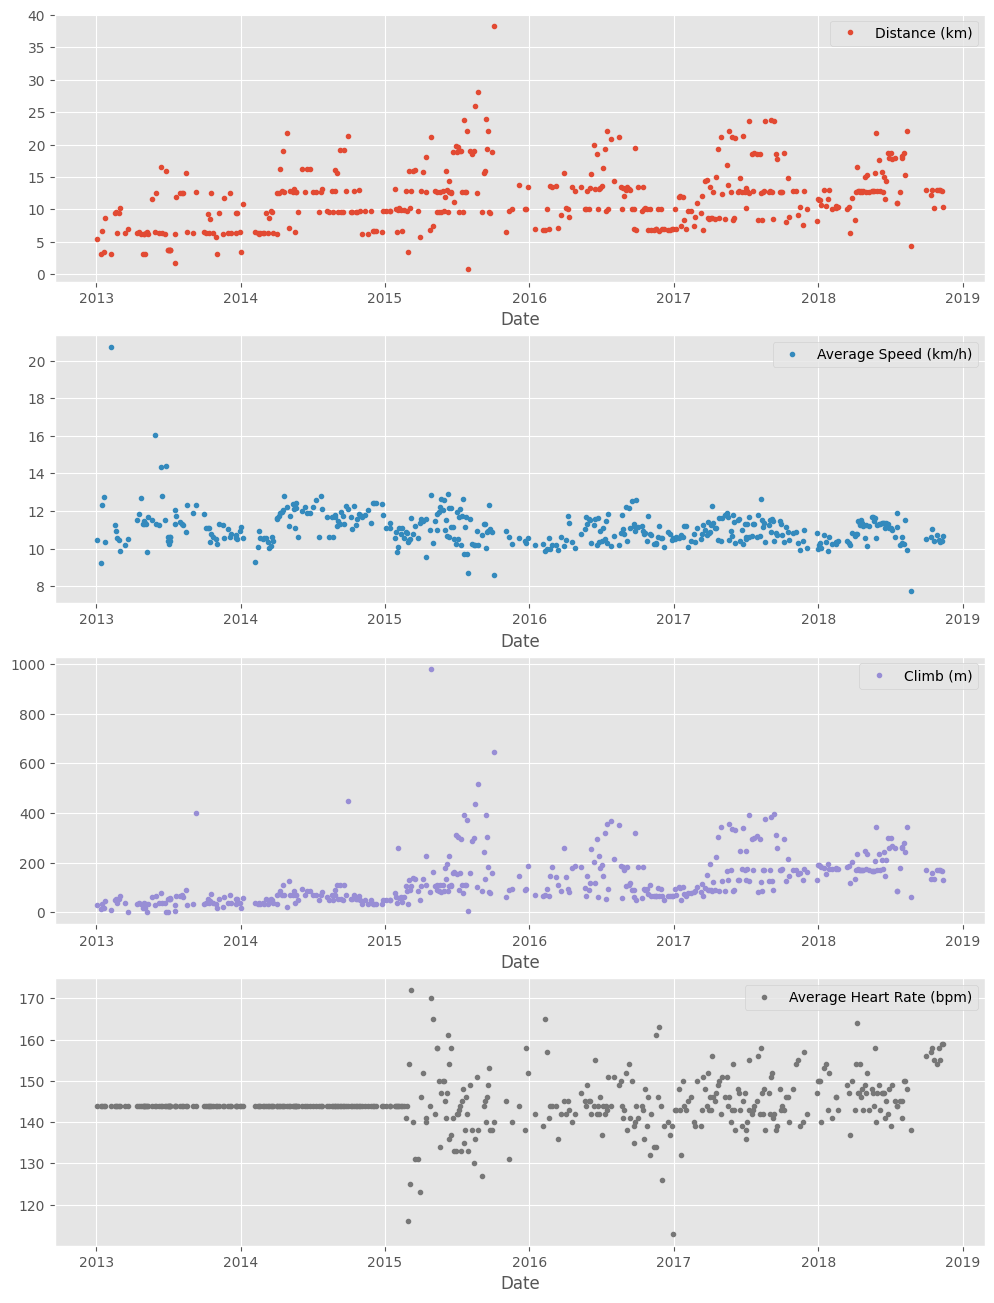

In [ ]:
#In the plotting code, enable subplots by setting the subplots parameter to True.
# Don’t usespaces around the = sign when used to indicate a keyword argument.

runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

# Show the plot using plt.show()
plt.show()

**Task5**

Calculate annual and weekly means for Distance (km), Average Speed (km/h), Climb(m) and Average Heart Rate (bpm).

In [ ]:
#Subset df_run for data from 2015 through 2018. Assign the resultto runs_subset_2015_2018.

runs_subset_2015_2018=df_run["2015":"2018"]

<ipython-input-20-9afc9314e9b1>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2015_2018=df_run["2015":"2018"]


In [ ]:
#Count the annual averages using resample() with 'A' alias, and the mean() methodfor runs_subset_2015_2018.
print("The 4 year's annual averages")
display(runs_subset_2015_2018.resample("A").mean())

The 4 year's annual averages


<ipython-input-21-2c573cf7223e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(runs_subset_2015_2018.resample("A").mean())


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


In [ ]:
#Count the average weekly statistics using resample() with 'W' alias, andthe mean() method twice.

print("4 Year's weekly average statistics")
display(runs_subset_2015_2018.resample("W").mean().mean())

4 Year's weekly average statistics


<ipython-input-22-d11583cbb026>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(runs_subset_2015_2018.resample("W").mean().mean())


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

In [ ]:
#Filter from dataset column Distance (km) and count the average number of trainings perweek 
#using resample() with the count() and mean() methods. Assign the result to weekly_counts_average.

weekly_counts_average=runs_subset_2015_2018["Distance (km)"].resample("W").count().mean()
print("How many trainings per week I had on average:",weekly_counts_average)


How many trainings per week I had on average: 1.5


**Task6**

Prepare data and create a plot

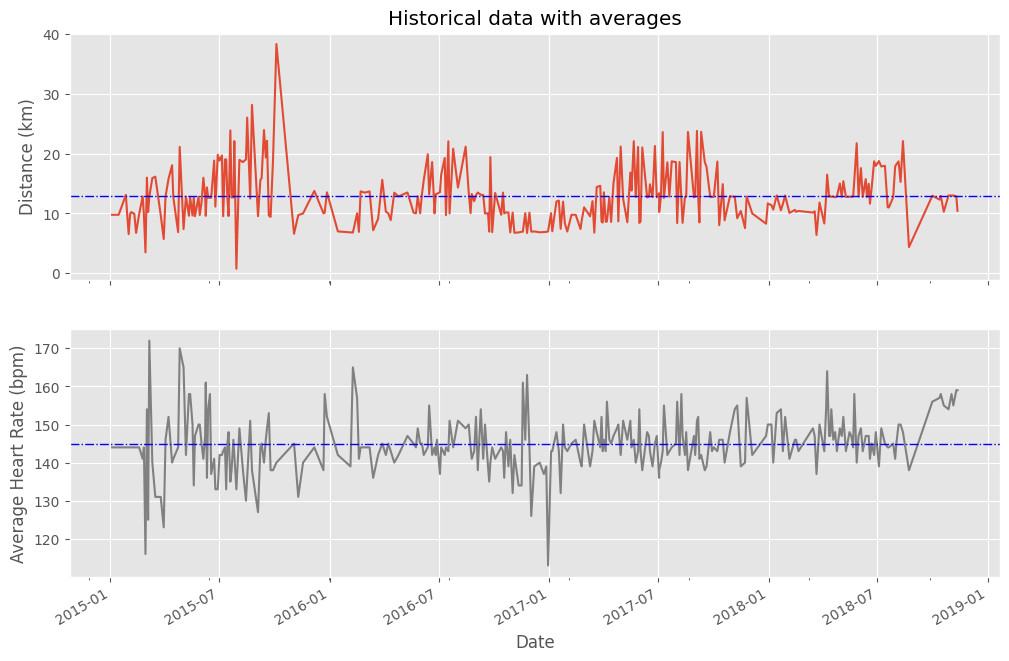

In [ ]:
#Select information for distance and then for heart rate from runs_subset_2015_2018 and assign
# to runs_distance and runs_hr, respectively

runs_distance=runs_subset_2015_2018["Distance (km)"]
runs_hr=runs_subset_2015_2018["Average Heart Rate (bpm)"]


#Create two subplots with shared x-axis using the plt.subplots() method, 
#setting the firstpositional parameter to 2, sharex to True, and figsize to (12,8). Assign the outputto fig, (ax1, ax2) variables.

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))


#Plot distance on the first subplot, setting parameter ax to ax1.
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# On the second subplot (ax2), add a horizontal line with axhline() for the average value ofheart rate counted as runs_hr.mean().
# Set color to 'blue', linewidth to 1,and linestyle to '-.'


runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.show()

**Task 7**

Prepare data and create a plot

In [ ]:
#Subset df_run for data from 2013 through 2018 and select the Distance (km) column.
#Count annual totals with resample() and sum(). Assign the resultto df_run_dist_annual

df_run_dist_annual=runs_subset_2013_2018["Distance (km)"].resample("A").sum()
print(df_run_dist_annual)

Date
2013-12-31     498.25
2014-12-31     755.76
2015-12-31    1115.43
2016-12-31     821.64
2017-12-31    1099.49
2018-12-31     853.70
Freq: A-DEC, Name: Distance (km), dtype: float64


In [ ]:
#Create a plot with plt.figure(), setting figsize to define a plot of size 8.0 inches x 5.0inches.

fig=plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

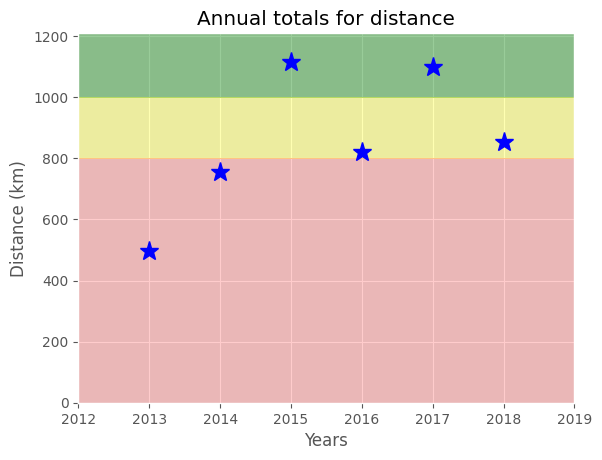

In [ ]:
#Customize the plot with horizontal span from 0 to 800 km with ax.axhspan().Set color to 'red' and alpha to 0.2.


ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

#•Show the plot with plt.show().
plt.show()

**Task 8**

Create a plot with observed distance of runs and decomposed trend.

In [ ]:
#Import the statsmodels.api under the alias sm.

import statsmodels.api as sm


In [ ]:
#Subset df_run from 2013 through 2018, select Distance (km) column, resample weekly,and fill NaN values with the bfill() method.
# Assign to df_run_dist_wkly.

df_run_dist_wkly=runs_subset_2013_2018["Distance (km)"].resample("W").bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

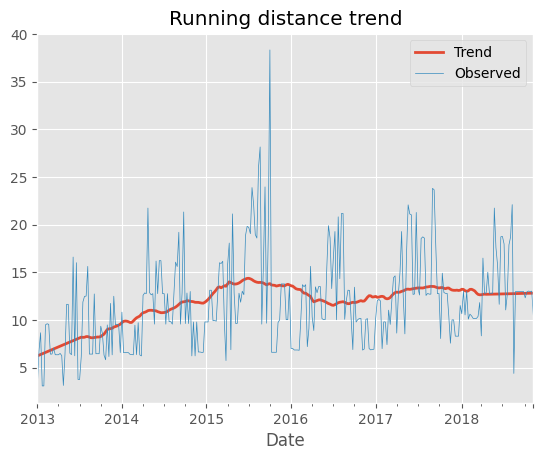

In [ ]:
#Create a plot with plt.figure(), defining plot size by setting figsize to (12,5).

ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

**Task 9**

Create a customized histogram for heart rate distribution

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-37-19c9657564db>:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']


ValueError: ignored

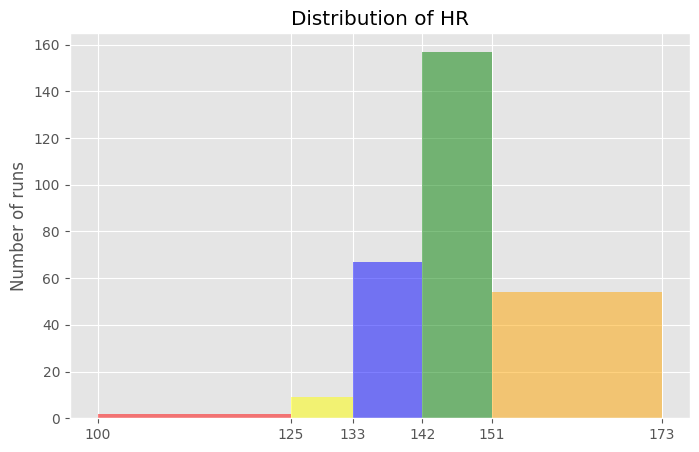

In [ ]:
#Subset df_run from March 2015 through 2018 then select the Average Heart Rate(bpm) column.
# Assign the result to df_run_hr_all.


df_run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']

#Create a plot with plt.subplots(), setting figsize to (8,5). Assign the result to fig,ax.
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['red', 'yellow', 'blue', 'green', 'orange']

fig, ax = plt.subplots(figsize=(8, 5))

#Create customized x-axis ticks with ax.set_xticklabels().
# Set the parameters labels to zone_names, rotation to -30, and ha to 'left'.



n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-25, ha='left')

#•Show the plot with plt.show()
plt.show()

**Task 10**

Create a summary report.

In [ ]:
#Concatenate the df_run DataFrame with df_walk and df_cycle using append(), thensort based on the index in descending order. 
#Assign the result to df_run_walk_cycle.

df_walk=df_activities[df_activities['Type'] == 'Walking'].copy()
print(df_walk)


df_run_walk_cycle = df_run.append([df_walk, df_cycle]).sort_index(ascending=False)

#Group df_run_walk_cycle by activity type, then select the columns in dist_climb_cols.Sum the result using sum(). 
#Assign the result to df_totals

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']


df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Use the stack() method on df_summary to show a compact reshaped form of the full summary report.
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack()





                        Type  Distance (km) Duration Average Pace  \
Date                                                                
2013-08-15 18:49:50  Walking           2.48  2:23:46        57:56   
2013-08-08 07:56:08  Walking           1.51    15:24        10:11   
2013-06-03 07:04:59  Walking           1.33    11:59         9:03   
2013-04-29 18:48:30  Walking           1.37    22:39        16:30   
2013-04-29 13:10:14  Walking           3.83    38:30        10:04   
2013-04-28 10:56:47  Walking           1.32    13:48        10:30   
2013-04-18 21:48:44  Walking           1.50    24:41        16:28   
2013-03-11 18:27:56  Walking           1.86    16:39         8:56   
2012-11-04 18:59:06  Walking           1.22    12:05         9:54   
2012-09-03 15:25:22  Walking           2.49    26:58        10:51   
2012-09-03 13:20:56  Walking           4.29    39:25         9:12   
2012-08-30 07:10:21  Walking           1.43    15:12        10:40   
2012-08-29 18:19:26  Walking      

<ipython-input-41-e0ef2ab09a9c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle = df_run.append([df_walk, df_cycle]).sort_index(ascending=False)


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

**Task 11**

Use FUN FACTS data to answer some fun questions

In [ ]:
#Calculate the instructor's average shoes per lifetime. 
#Use number of 'Total number of km run'from FUN FACTS and divide by the number of pairs of shoes gone through.


ava_distance=df_activities["Distance (km)"].mean()
print("The avarage distance:",ava_distance,"KM")

longest_distance=df_activities["Distance (km)"].max()
print("The longest distance:",longest_distance,"km")

highest_climb=df_activities["Climb (m)"].max()
print("Highest climbing:",highest_climb,"M")

total_climb=df_activities["Climb (m)"].sum()
print("The total Climbing:",total_climb,"M")


TOTAL_number_of_km_run=df_activities[df_activities['Type']=='Running']['Distance (km)'].sum()
print("Total number of km run:",TOTAL_number_of_km_run,"KM")

print("Total run :   459")     #Previously we get the value when we check the value count

print("Number of running shoes gone through: 7 pairs")
fun_facts=(TOTAL_number_of_km_run/7)
print(fun_facts)

The avarage distance: 11.757834645669291 KM
The longest distance: 49.18 km
Highest climbing: 982 M
The total Climbing: 65024 M
Total number of km run: 5224.5 KM
Total run :   459
Number of running shoes gone through: 7 pairs
746.3571428571429
